In [2]:
# normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# import the stats library from numpy
from scipy import stats

# plotting modules and libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# command so that plots appear in the ipython nb
%matplotlib inline

In [3]:
dataset = randn(25)

(0.0, 1.0)

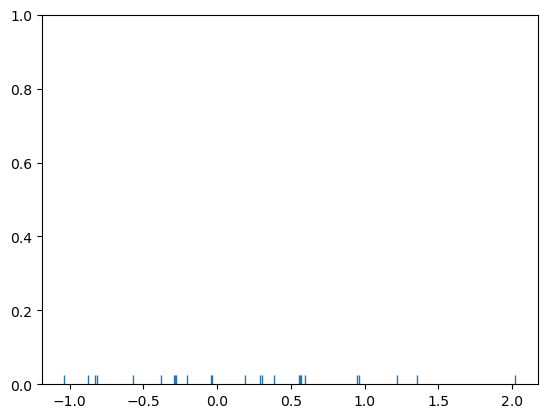

In [5]:
sns.rugplot(dataset)

plt.ylim(0,1)

<Axes: >

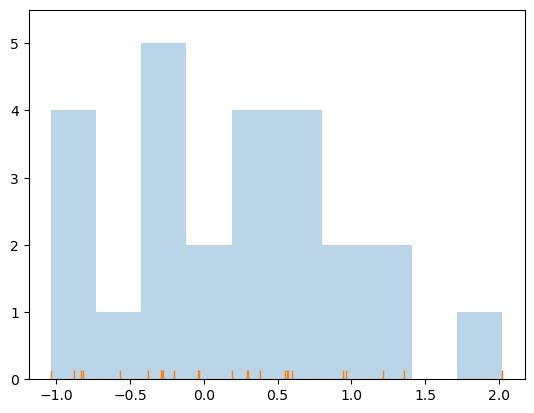

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

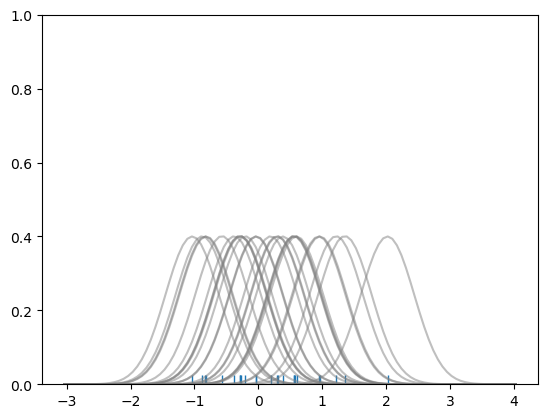

In [8]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset))) ** 0.2  # gausian formula
 
kernel_list = []

for data_point in dataset:
    
    # create a kernel for each point and appent to kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

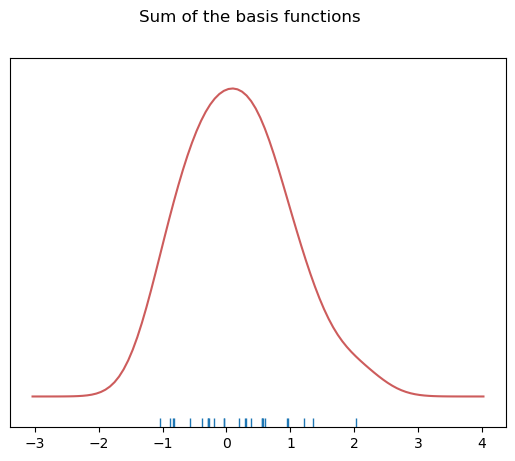

In [9]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

<Axes: ylabel='Density'>

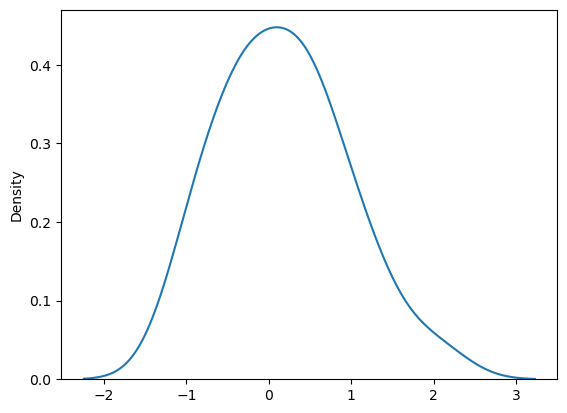

In [11]:
sns.kdeplot(dataset) # same as all the above

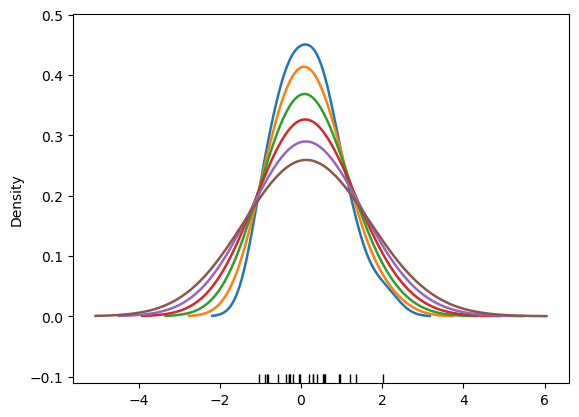

In [13]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw_method=bw,lw=1.8,label=bw)

In [15]:
#kernel_options = ['biw','cos','epa','gau','tri','triw']

#for kern in kernel_options:
#    sns.kdeplot(dataset,kernel=kern,label=kern)

# Support for alternate kernels has been removed; using Gaussian kernel.
# This will become an error in seaborn v0.13.0; please update your code.

/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_23765/1674317051.py:1: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(dataset,vertical=True)


<Axes: xlabel='Density'>

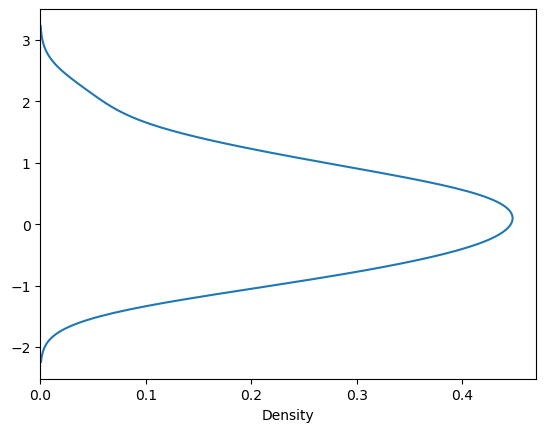

In [16]:
sns.kdeplot(dataset,vertical=True)

<Axes: ylabel='Density'>

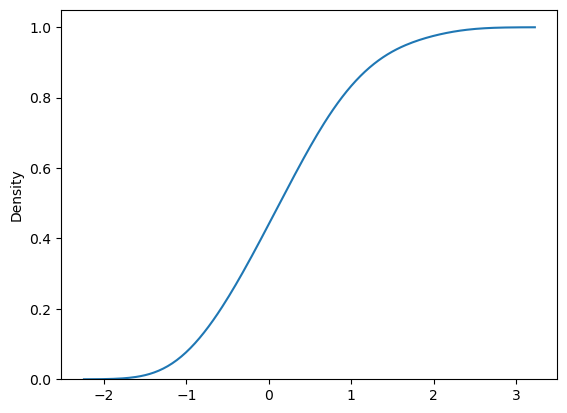

In [17]:
sns.kdeplot(dataset,cumulative = True)

<Axes: ylabel='Density'>

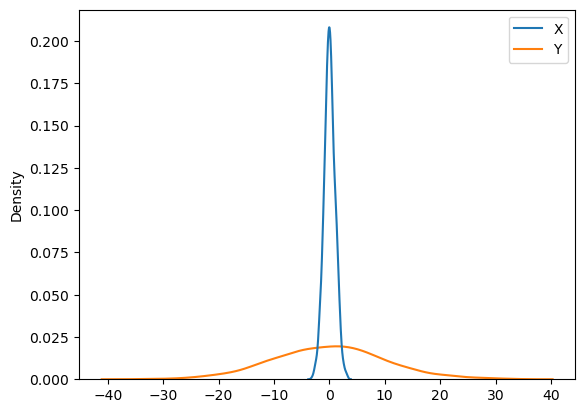

In [18]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

<Axes: ylabel='Density'>

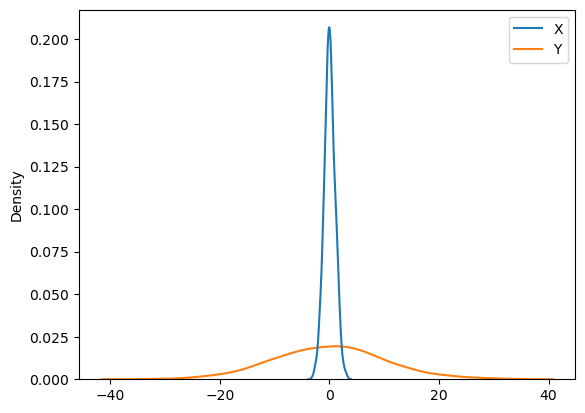

In [23]:
sns.kdeplot(data=dframe,bw_method='silverman')

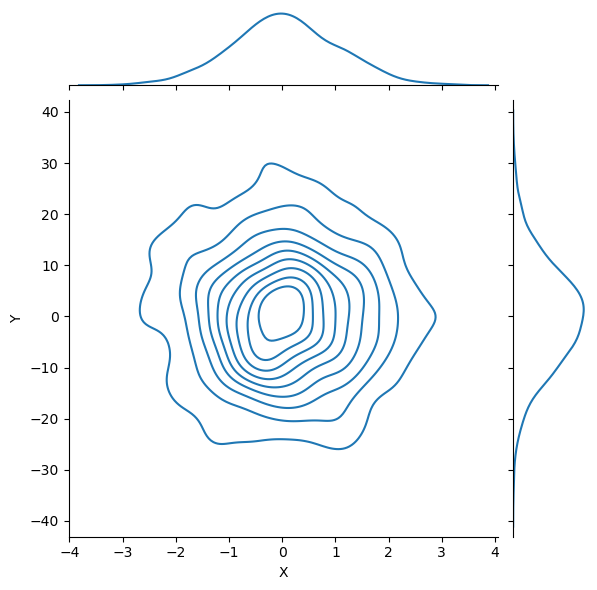

In [25]:
sns.jointplot(data=dframe,x='X',y='Y',kind='kde')